In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import os
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

plt.rcParams.update({'font.size': 24})
sns.set_style("darkgrid")

# EDA & Data Preprocessing
In this notebook, we're going to carry out a few EDA operations to get acquainted with the data set of the challenge. We will analyze the 7 features and their relationships, generate new derived features and justify the representativeness of a 10% subsample on the basis of faster subsequent training.

## Dataframes creation

In [2]:
df_x = pd.read_csv('../dataset/0-original/X.csv').drop(columns=['id'])
df_y = pd.read_csv('../dataset/0-original/y.csv').drop(columns=['id'])
df_y['trq_target'] = df_x['trq_measured'] / (df_y['trq_margin'] / 100 + 1)
df_x.describe()

trq_measured            oat            mgt             pa  \
count  742625.000000  742625.000000  742625.000000  742625.000000   
mean       65.097549      12.675167     592.246116     511.776065   
std        13.253672       8.066084      39.654582     563.190555   
min        14.673340     -19.250000     467.300000    -208.389200   
25%        56.100000       7.500000     562.400000     135.331200   
50%        65.700000      13.703440     589.400000     340.461600   
75%        75.500000      18.500000     622.300000     588.264000   
max       104.730500      36.799130     723.400000    3097.510000   

                 ias             np             ng  
count  742625.000000  742625.000000  742625.000000  
mean       79.324591      97.377919      95.517281  
std        35.395075       3.996721       3.635084  
min         0.000000      85.010000      90.001830  
25%        51.125000      95.330000      92.226440  
50%        88.375000      99.759770      94.810000  
75%       110.562500     100.020000      99.900000  
max       137.562500     101.560000     101.220000

## Explorative Data Analysis
### Skewness study

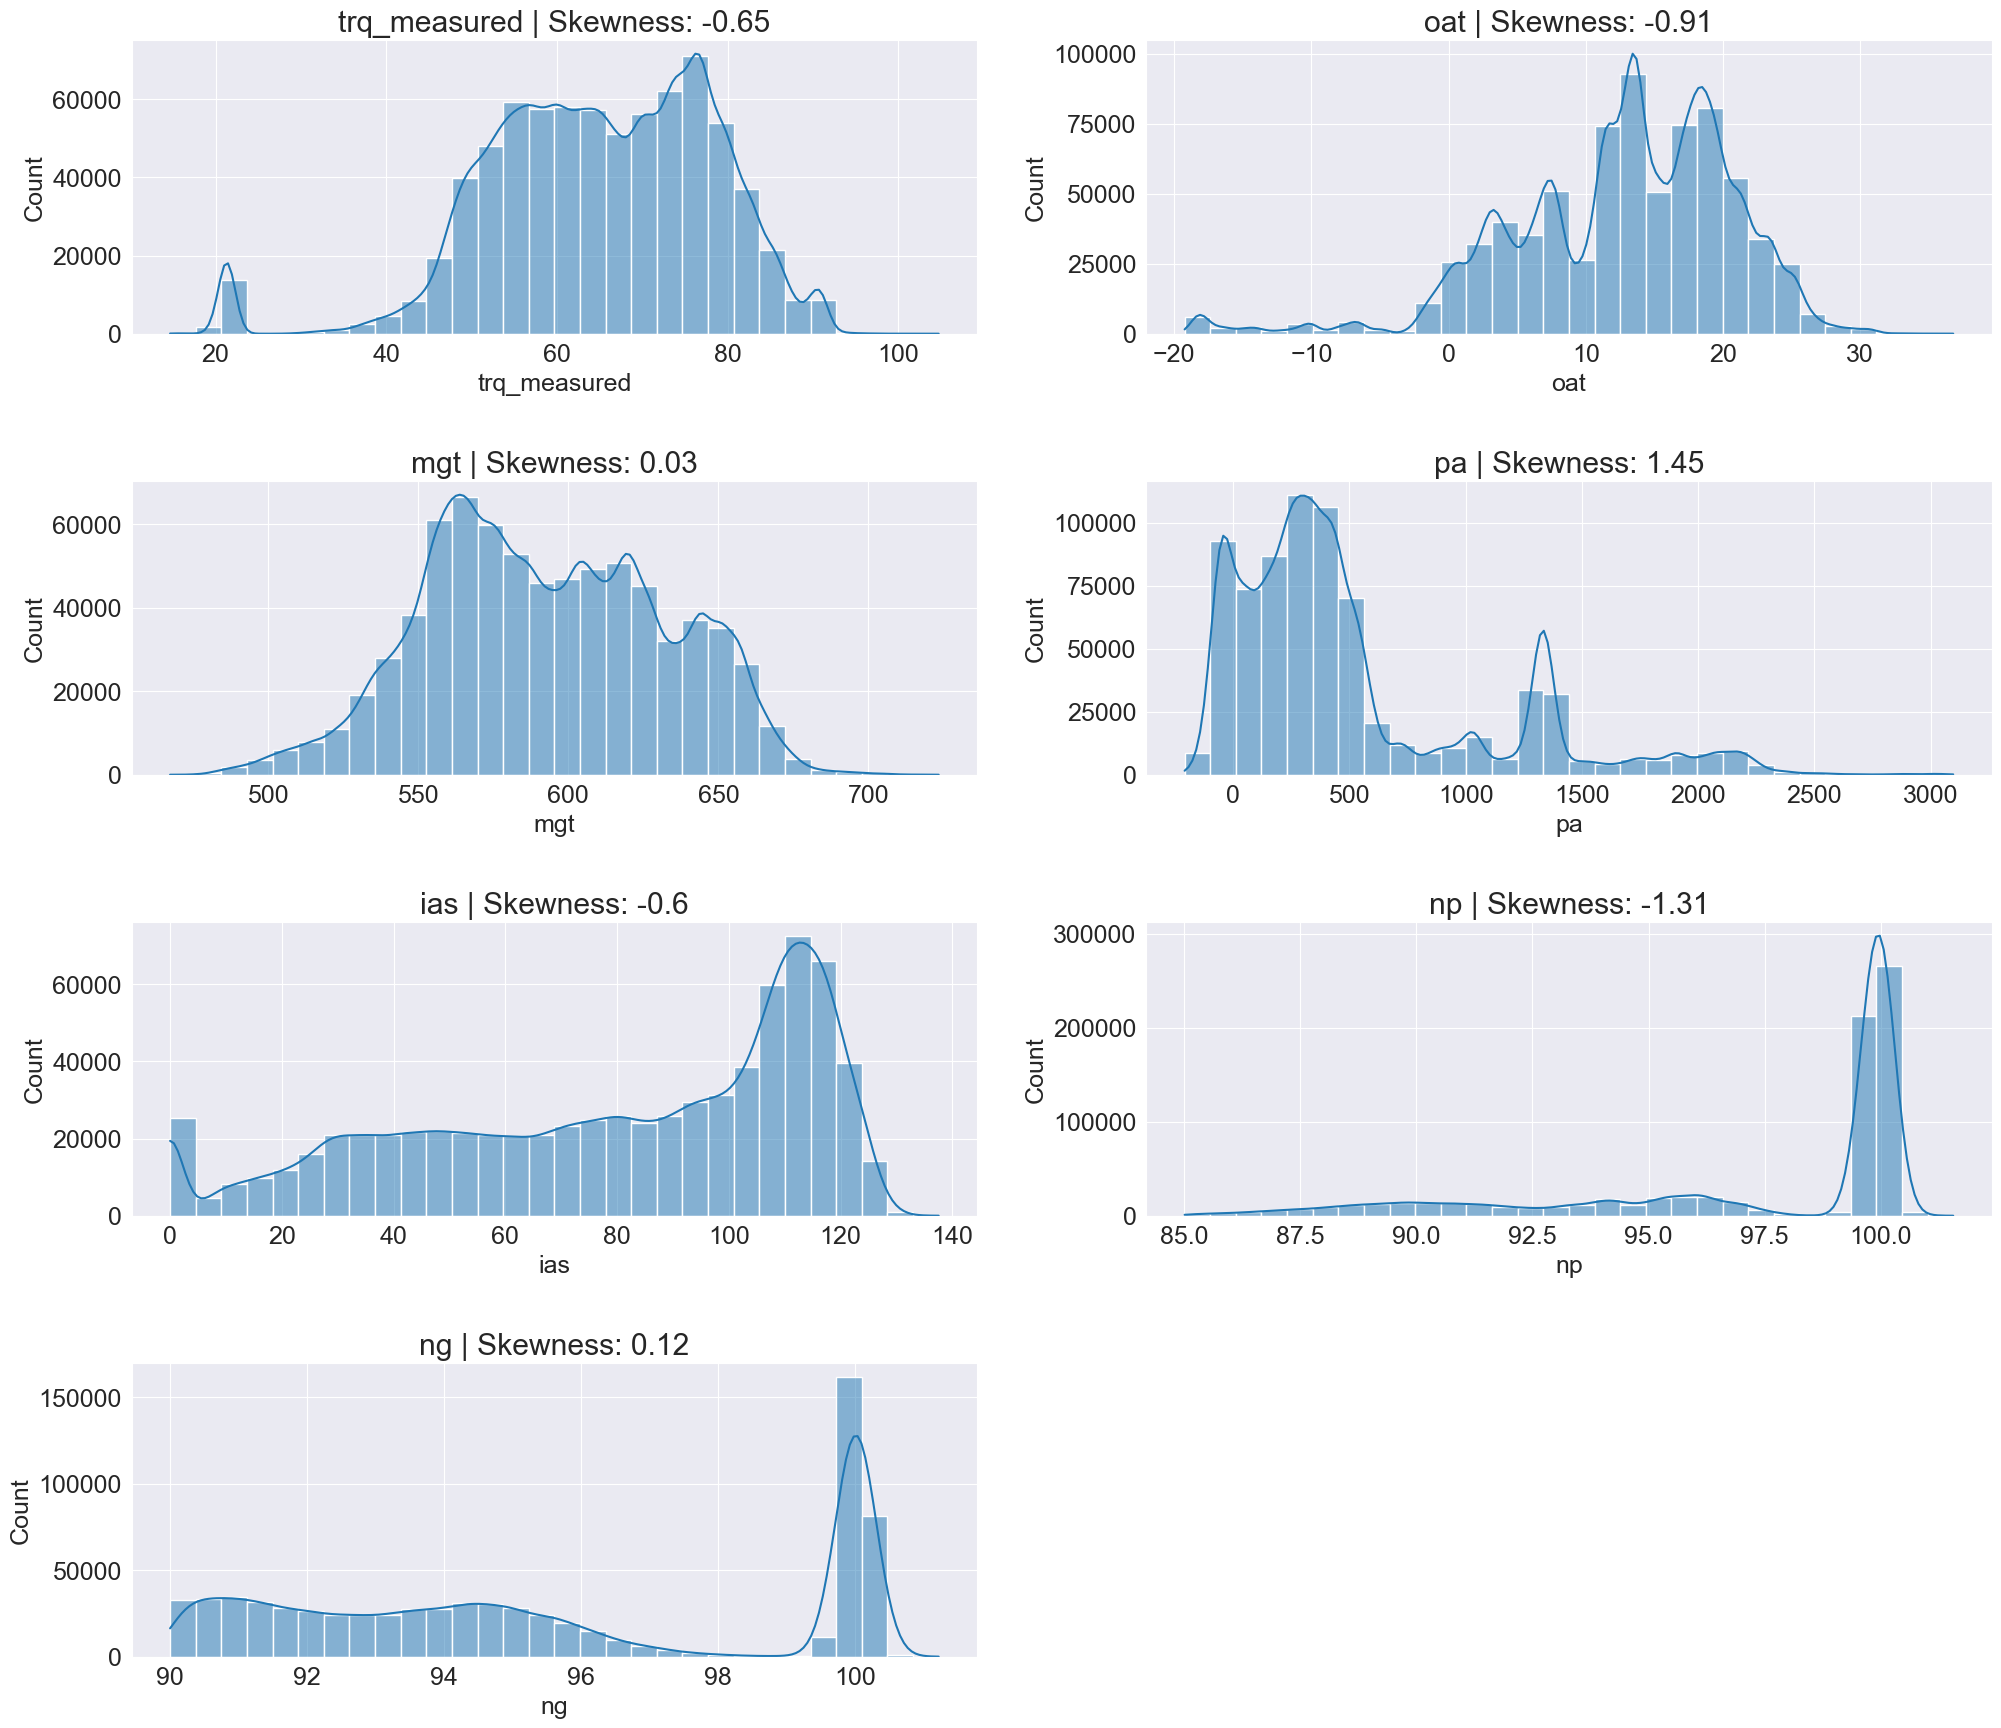

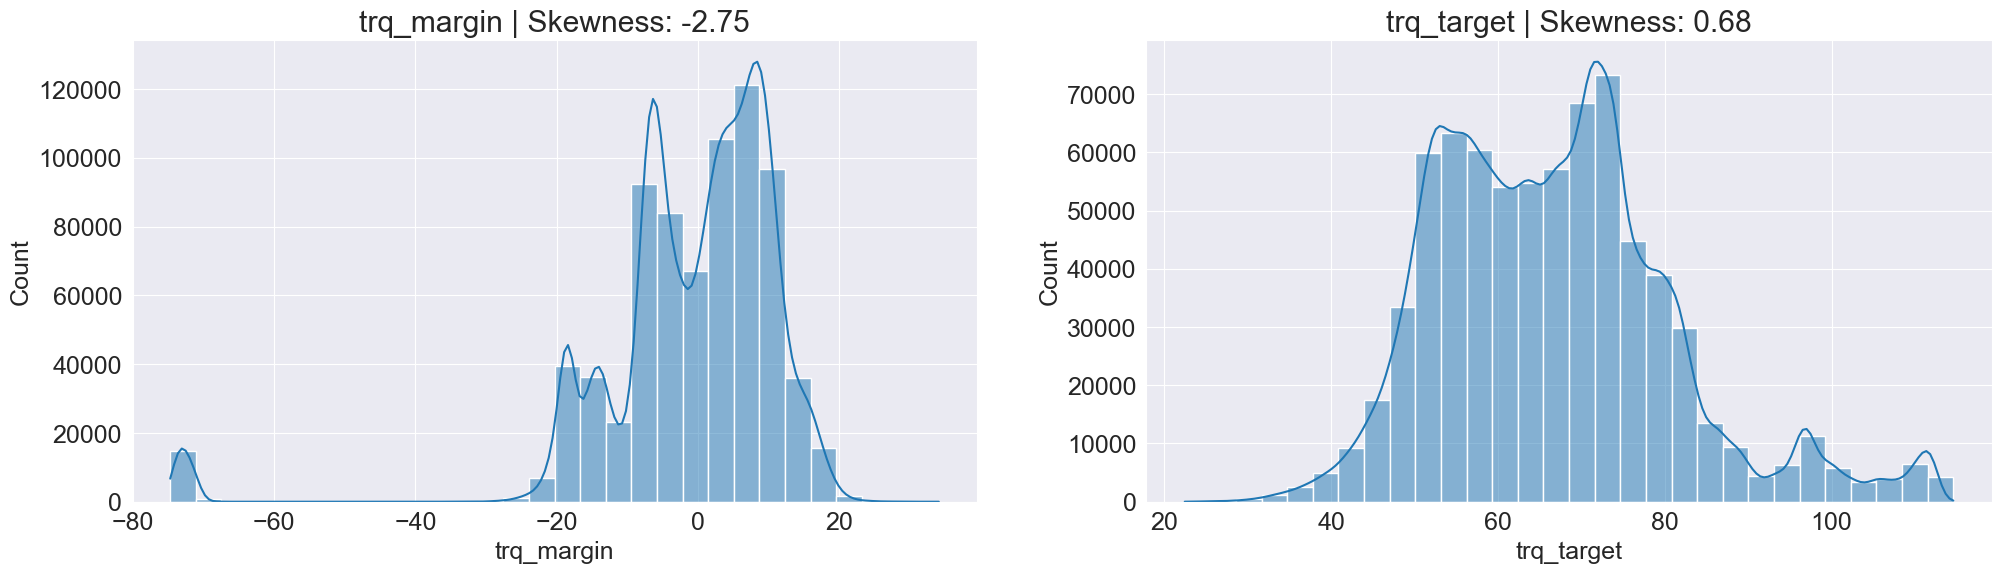

In [14]:
### PLOT FEATURES ###
num_x_features = len(df_x.columns)
plt.figure(figsize=(24, num_x_features * 3))
for idx, feature in enumerate(df_x.columns,1):
    plt.subplot((num_x_features + 1) // 2, 2, idx)
    sns.histplot(df_x[feature], kde=True, bins=30)
    plt.title(f"{feature} | Skewness: {round(df_x[feature].skew(), 2)}")

plt.subplots_adjust(hspace=0.5)

### PLOT Y_TRAIN FEATURES ###
num_y_features = 2
plt.figure(figsize=(24, num_y_features * 3))
for idx, feature in enumerate(['trq_margin','trq_target'], 1):
    plt.subplot((num_y_features + 1) // 2, 2, idx)
    sns.histplot(df_y[feature], kde=True, bins=30)
    plt.title(f"{feature} | Skewness: {round(df_y[feature].skew(), 2)}")

# plt.tight_layout()
plt.show()

The features in this dataset that have skewness – exactly 0 depicts the symmetrical distribution and the plots with skewness 1 or above 1 is positively or right skewd distribution. In right skewd or positively skewed distribution if the tail is more on the right side, that indicates extremely high values.

### Faulty distributions

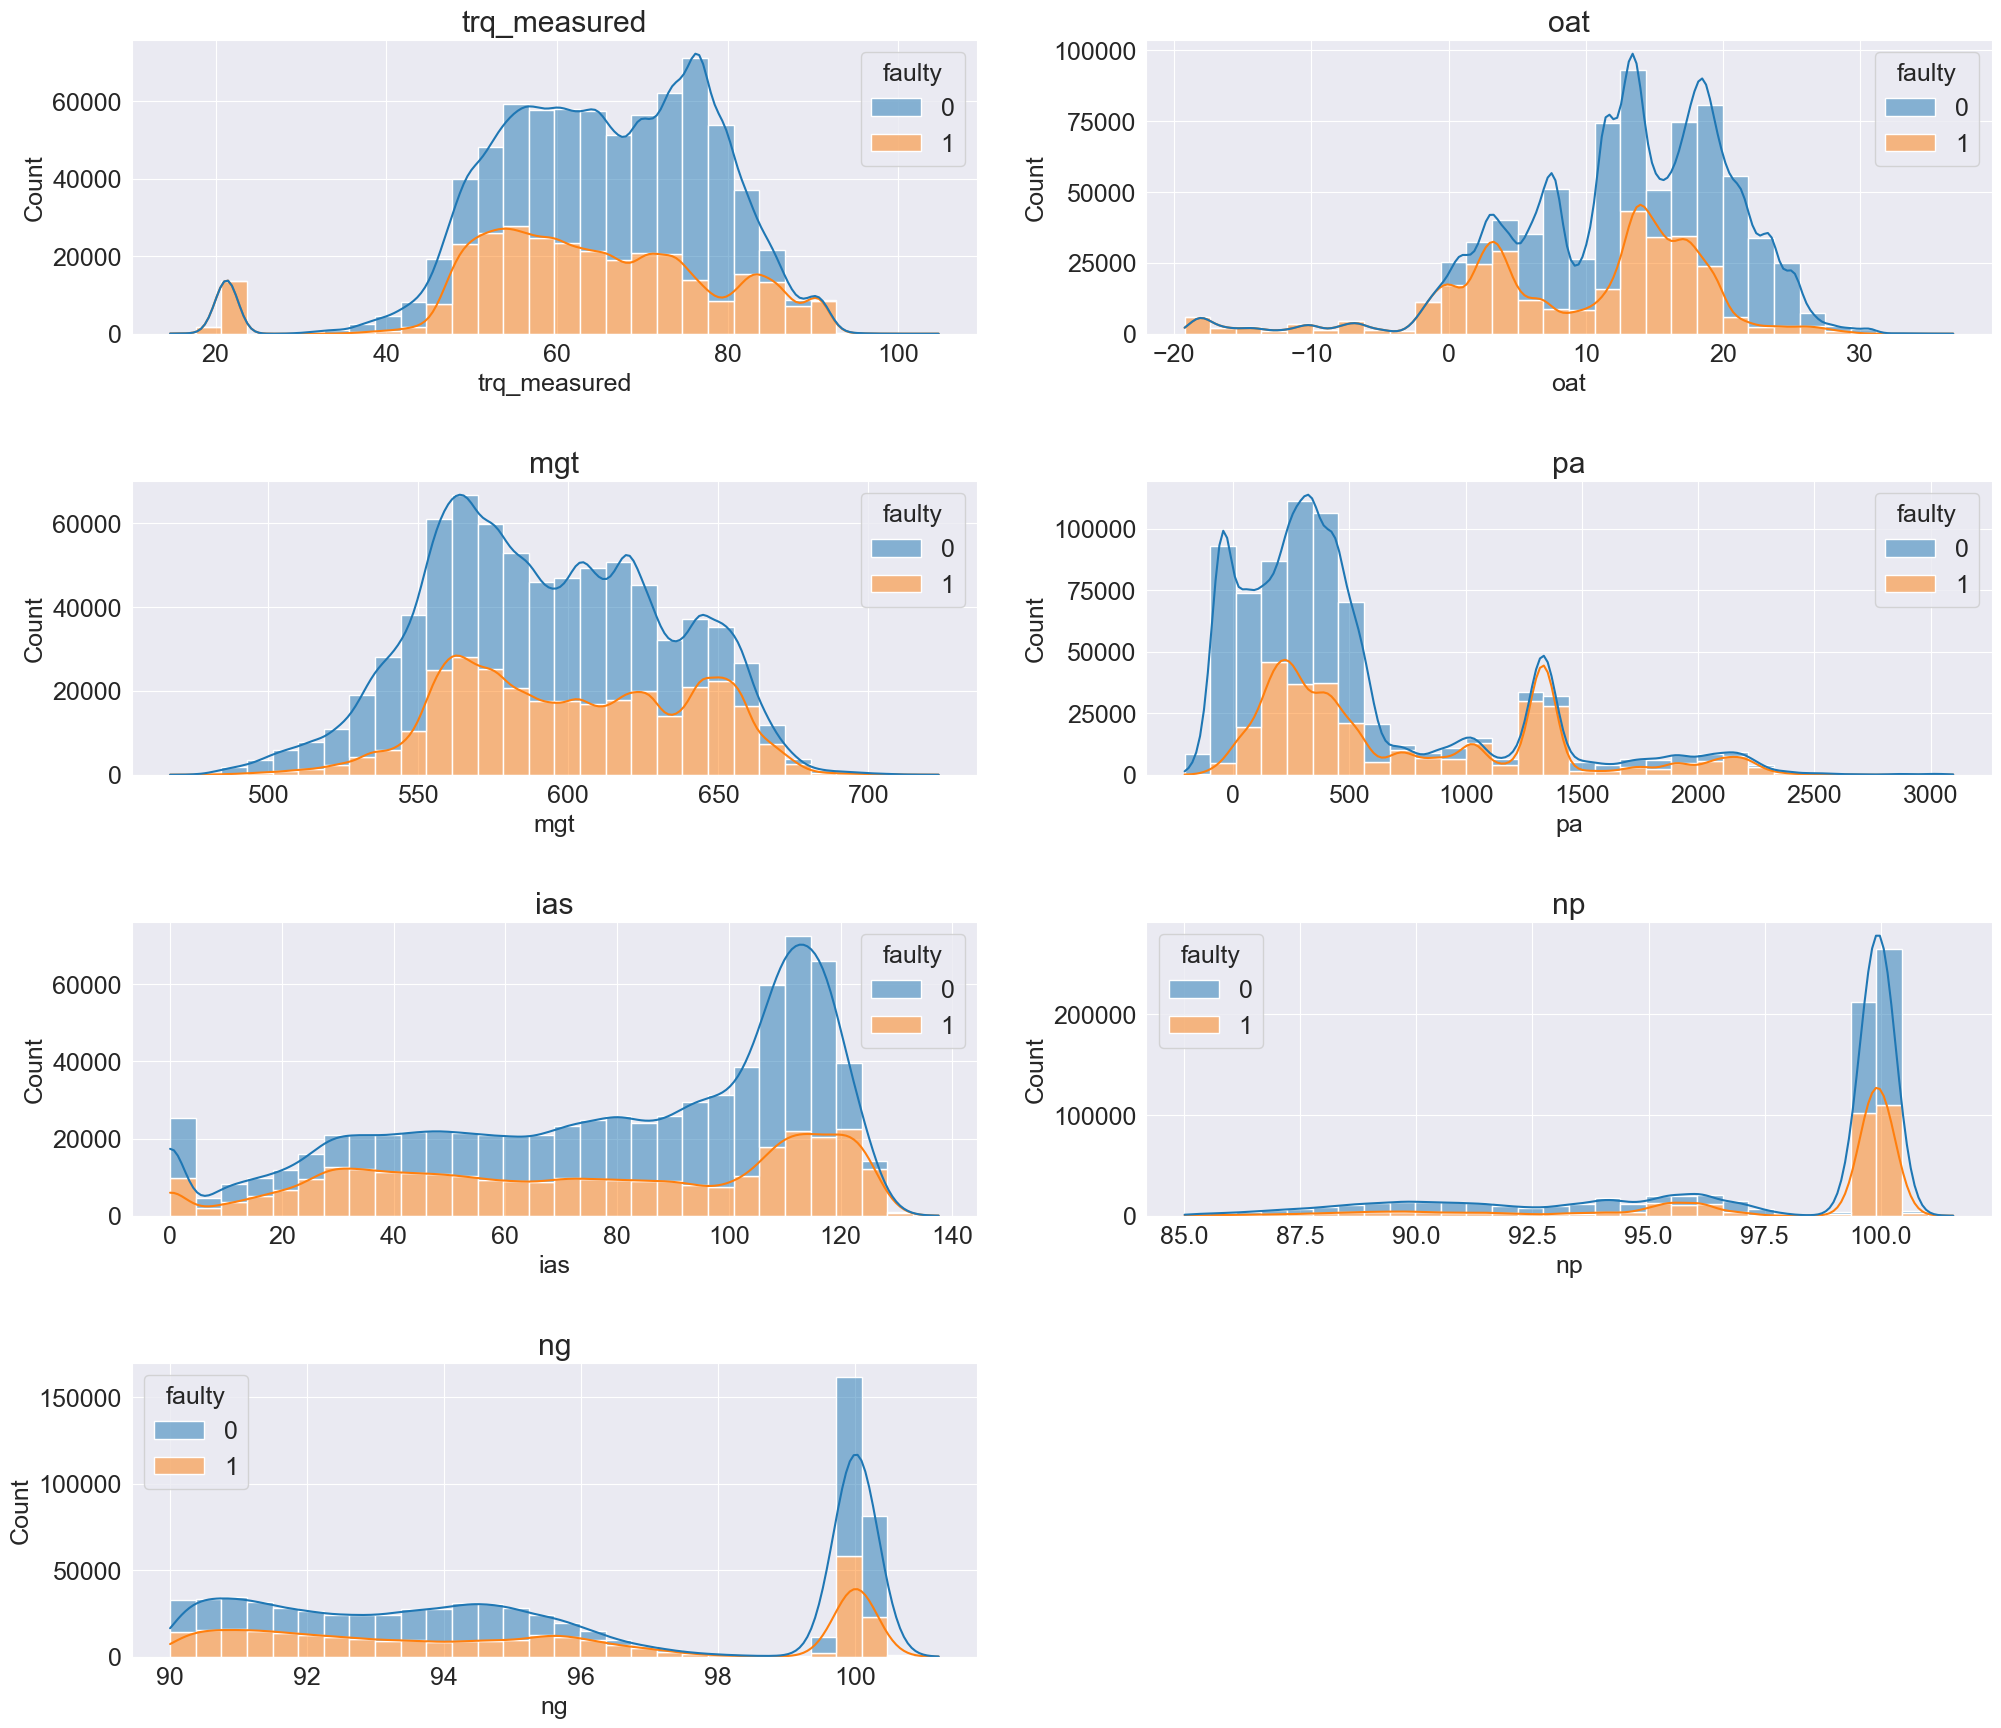

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

### PLOT FEATURES BY FAULTY CLASS LABEL ###
num_x_features = len(df_x.columns)
plt.figure(figsize=(24, num_x_features * 3))

for idx, feature in enumerate(df_x.columns, 1):
    plt.subplot((num_x_features + 1) // 2, 2, idx)
    sns.histplot(data=df_x, x=feature, hue=df_y["faulty"], kde=True, bins=30, palette="tab10", multiple="stack")
    plt.title(f"{feature}")

plt.subplots_adjust(hspace=0.5)
plt.show()


### Feature eptagram

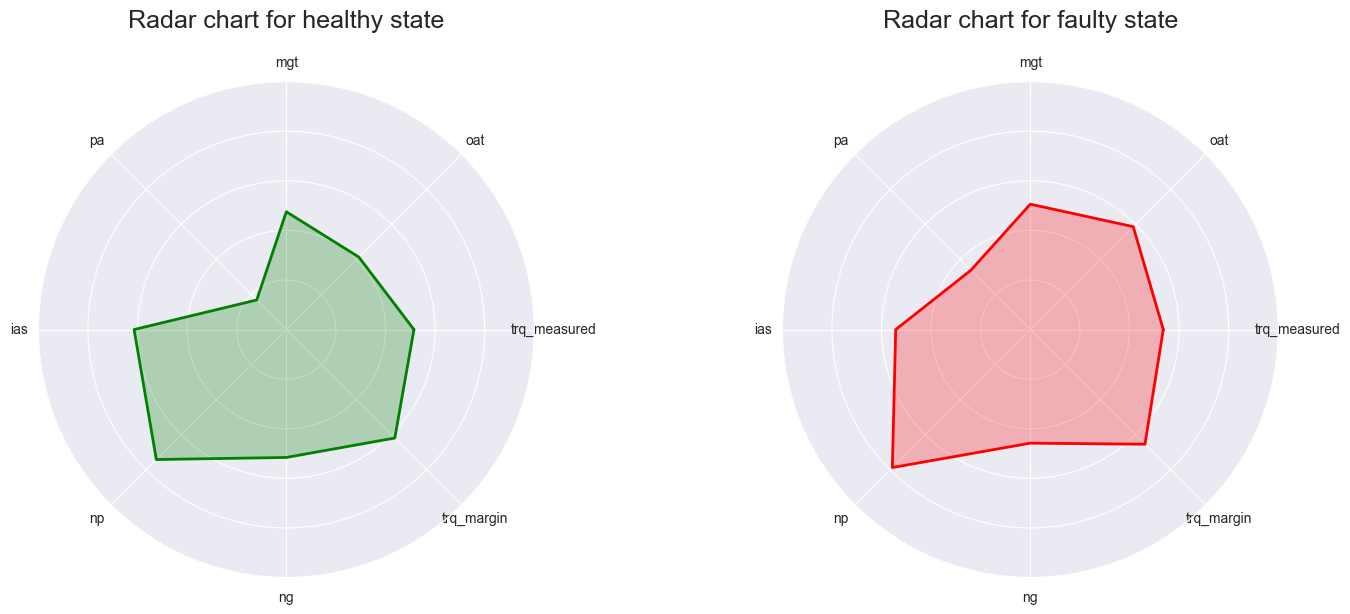

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# 1. Merge df_x (features) and df_y (labels) if necessary
# ----------------------------------------------------------------------
train_data = pd.concat([df_x, df_y], axis=1)

# Remove the 'id' column if present
if 'id' in train_data.columns:
    train_data = train_data.drop(['id'], axis=1)

# ----------------------------------------------------------------------
# 2. Remove 'trq_target' from the dataset
# ----------------------------------------------------------------------
if 'trq_target' in train_data.columns:
    train_data = train_data.drop(['trq_target'], axis=1)

# ----------------------------------------------------------------------
# 3. Split data into healthy (faulty == 0) and faulty (faulty == 1) subsets
# ----------------------------------------------------------------------
X_train_healthy = train_data[train_data['faulty'] == 0].drop('faulty', axis=1)
X_train_faulty = train_data[train_data['faulty'] == 1].drop('faulty', axis=1)

# ----------------------------------------------------------------------
# 4. Min-Max scaling: Normalize all features between 0 and 1
# ----------------------------------------------------------------------
def min_max_scale(df):
    return (df - df.min()) / (df.max() - df.min())

X_train_healthy_scaled = min_max_scale(X_train_healthy)
X_train_faulty_scaled = min_max_scale(X_train_faulty)

# Compute the mean value of each feature for both groups
mean_features_healthy = X_train_healthy_scaled.mean()
mean_features_faulty = X_train_faulty_scaled.mean()

labels = mean_features_healthy.index
values_healthy = mean_features_healthy.values
values_faulty = mean_features_faulty.values

# ----------------------------------------------------------------------
# 5. Prepare data for radar charts
# ----------------------------------------------------------------------
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Close the loop for radar charts
values_healthy = np.concatenate((values_healthy, [values_healthy[0]]))
values_faulty = np.concatenate((values_faulty, [values_faulty[0]]))
angles += angles[:1]

# ----------------------------------------------------------------------
# 6. Adjust figure size dynamically based on the number of features
# ----------------------------------------------------------------------
fig_size = (min(2 * num_vars, 18), min(2 * num_vars, 9))
fig, axs = plt.subplots(1, 2, figsize=fig_size, subplot_kw=dict(polar=True))

# Radar chart for healthy state
axs[0].fill(angles, values_healthy, color='g', alpha=0.25)
axs[0].plot(angles, values_healthy, color='g', linewidth=2)
axs[0].set_yticklabels([])
axs[0].set_xticks(angles[:-1])
axs[0].set_xticklabels(labels, fontsize=10)
axs[0].set_title("Radar chart for healthy state", size=18, pad=20)
axs[0].set_ylim(0, 1)  # Keep scale between 0 and 1

# Radar chart for faulty state
axs[1].fill(angles, values_faulty, color='r', alpha=0.25)
axs[1].plot(angles, values_faulty, color='r', linewidth=2)
axs[1].set_yticklabels([])
axs[1].set_xticks(angles[:-1])
axs[1].set_xticklabels(labels, fontsize=10)
axs[1].set_title("Radar chart for faulty state", size=18, pad=20)
axs[1].set_ylim(0, 1)  # Keep scale between 0 and 1

# Adjust layout to prevent overlap
plt.subplots_adjust(wspace=0.5)

plt.show()


### Correlation study

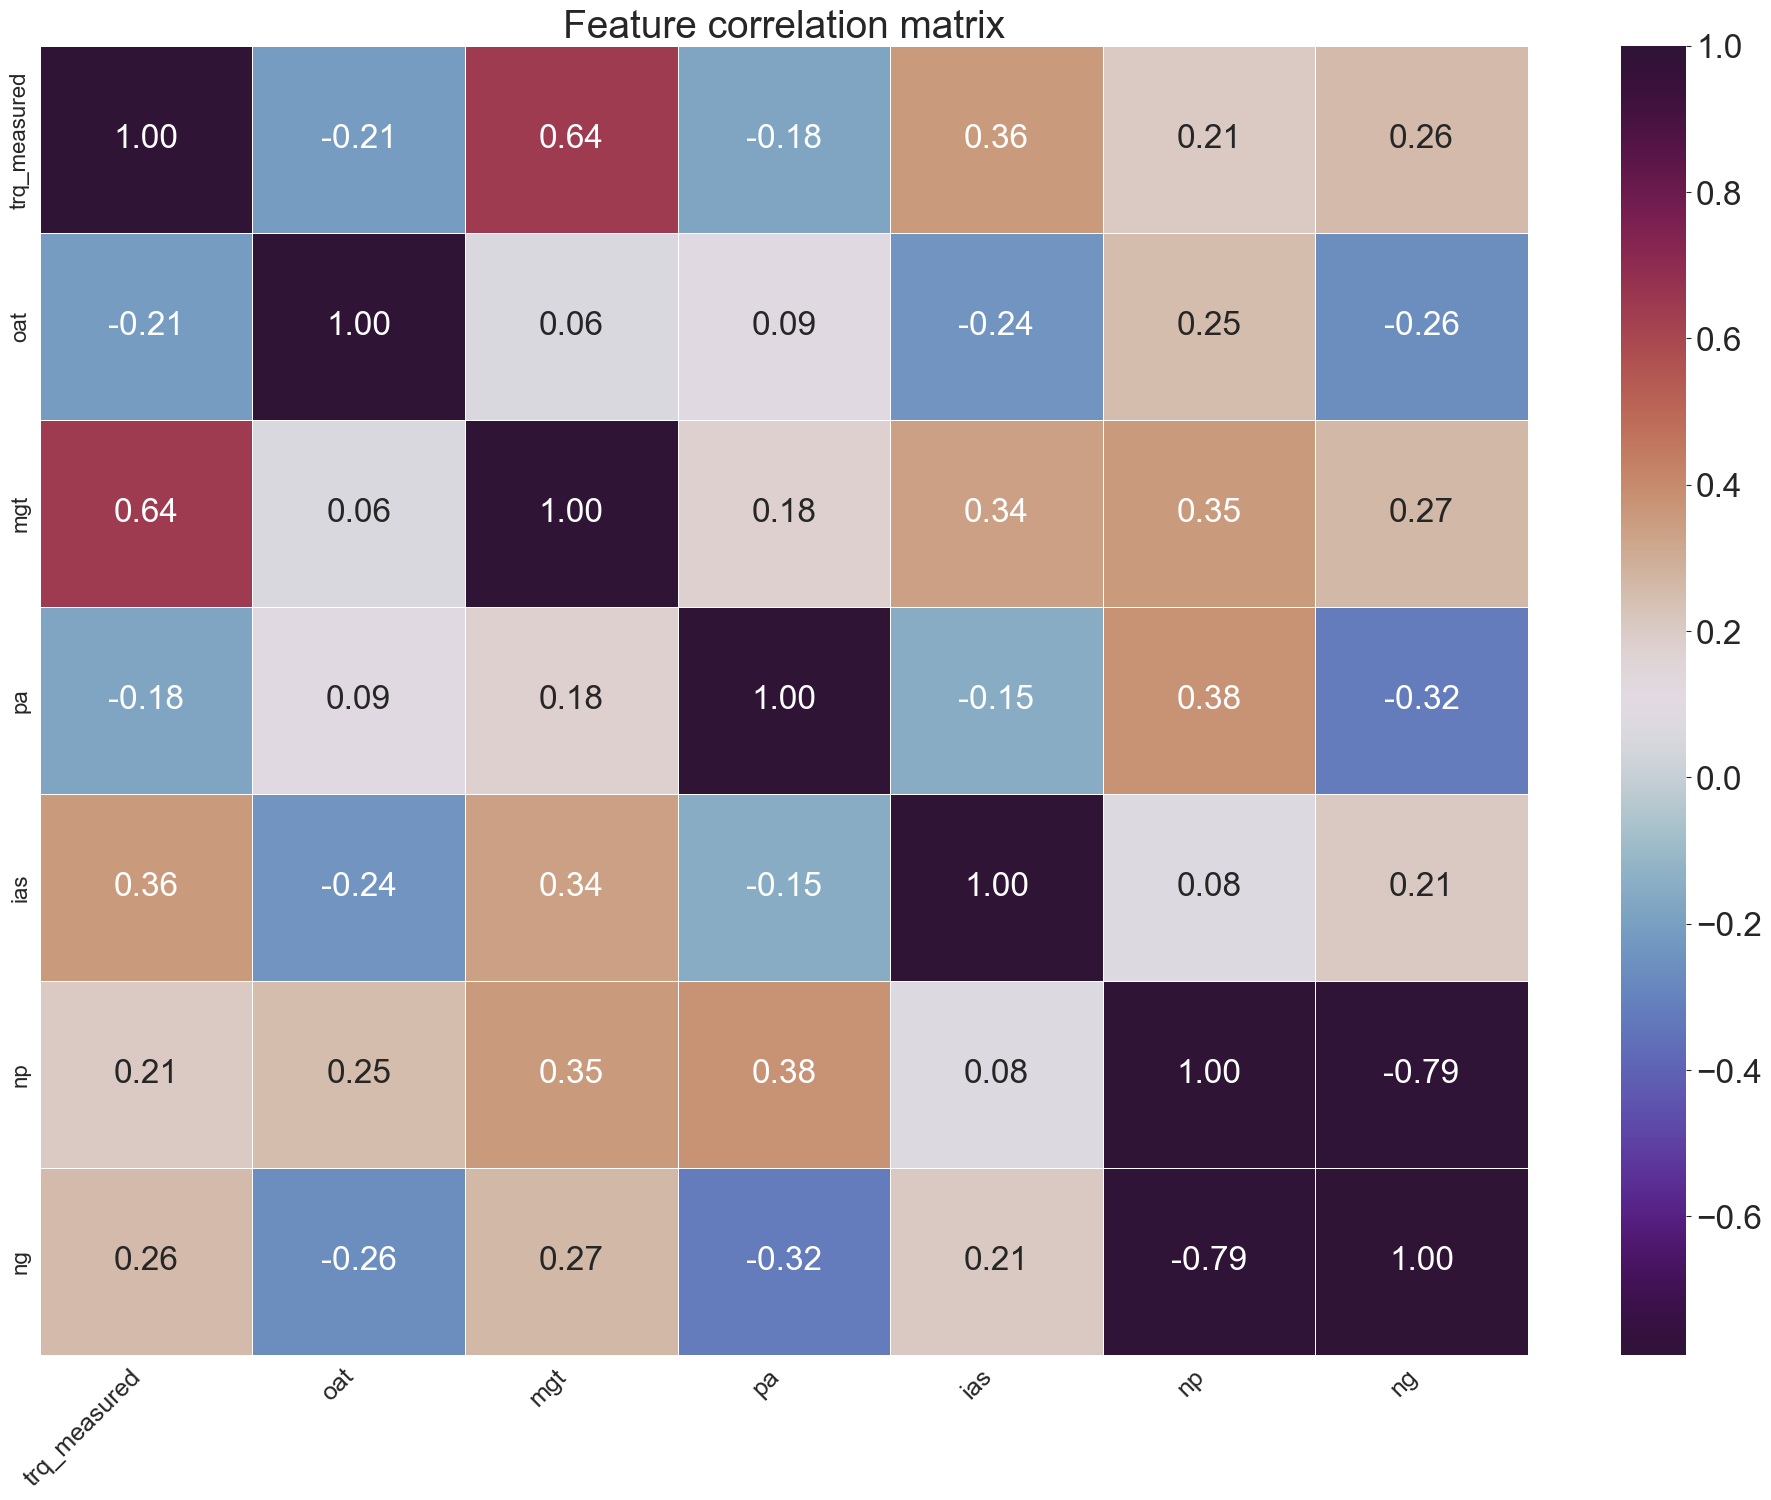

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

### PLOT CORRELATION MATRIX ###
plt.figure(figsize=(24, 17))
corr_matrix = df_x.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="twilight_shifted", linewidths=0.5, cbar=True)

plt.title("Feature correlation matrix", fontsize=28)
plt.xticks(rotation=45, ha="right", fontsize=18)
plt.yticks(fontsize=16)

plt.show()


### PCA

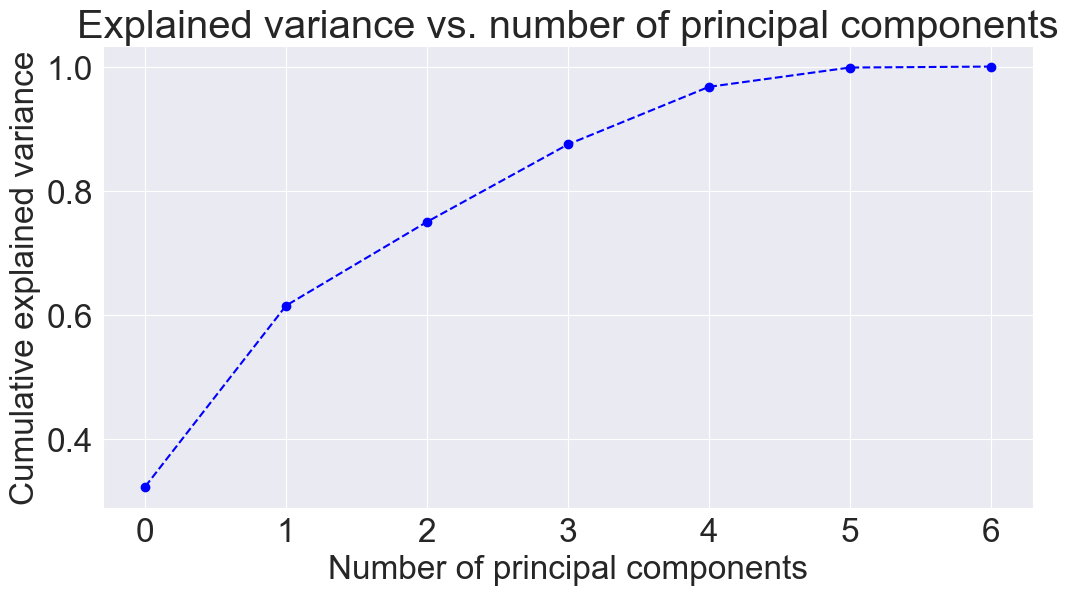

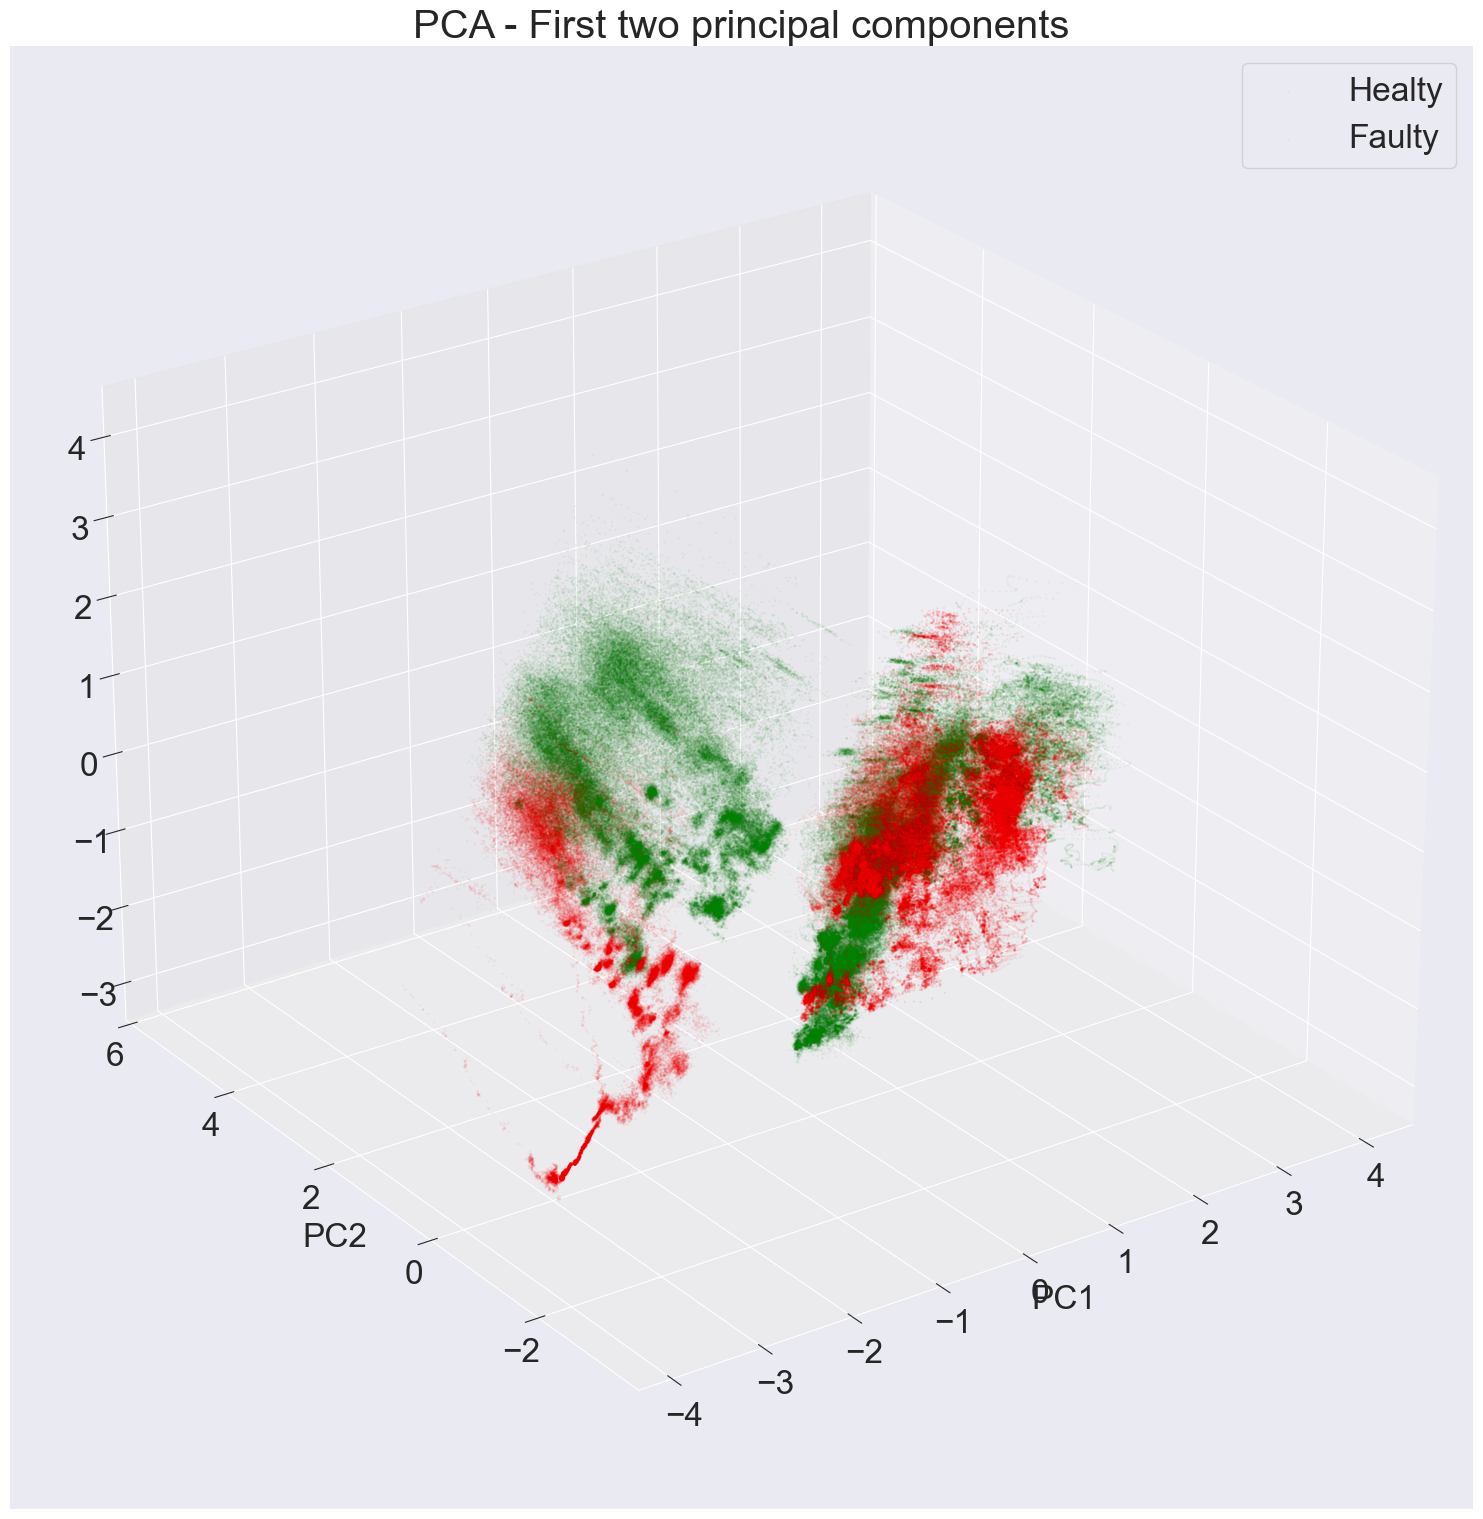

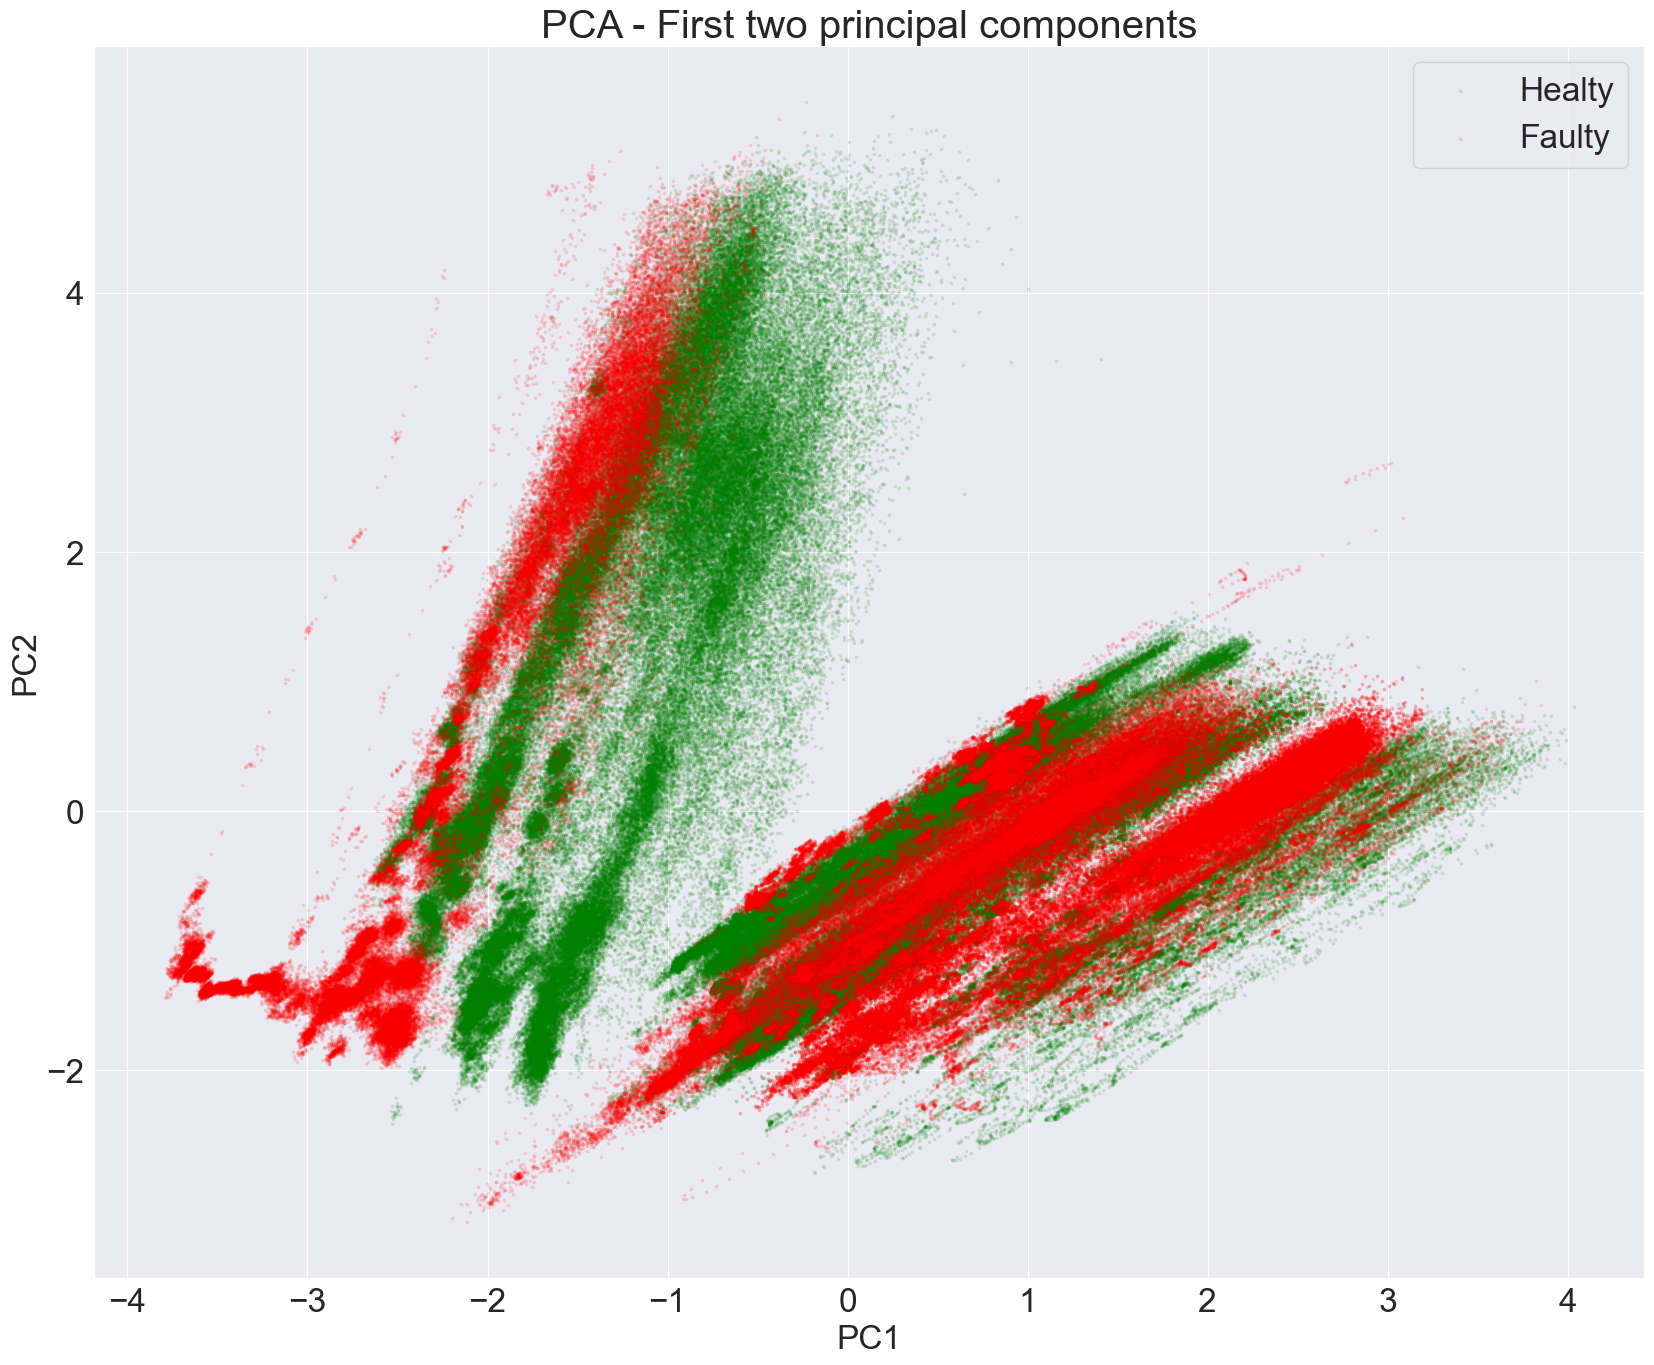

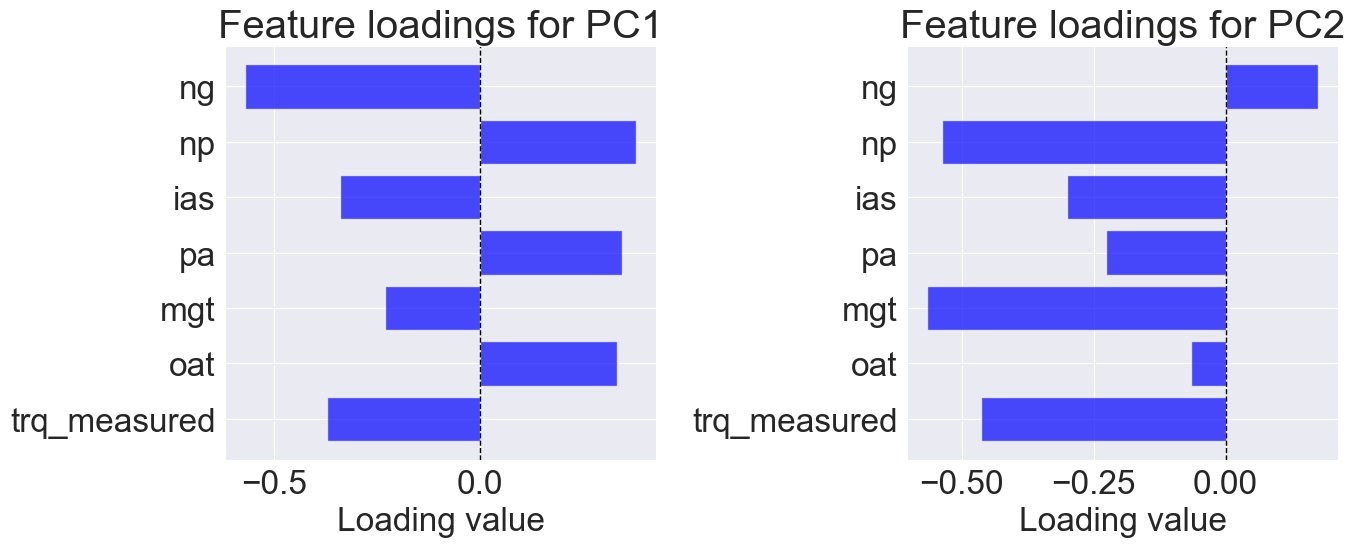

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------------------
# 1. Standardize df_x for PCA
# ----------------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_x)

# ----------------------------------------------------------------------
# 2. Apply PCA
# ----------------------------------------------------------------------
pca = PCA(n_components=len(df_x.columns))  # Keep all components initially
X_pca = pca.fit_transform(X_scaled)

# ----------------------------------------------------------------------
# 3. Plot cumulative explained variance
# ----------------------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs. number of principal components")
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------
# 4. Scatter plot of first two principal components
# ----------------------------------------------------------------------
fig = plt.figure(figsize=(20, 19))
ax = fig.add_subplot(111, projection='3d')
faulty_labels = df_y['faulty'].values  # Get faulty labels from df_y

# Define colors and labels
colors = {0: 'g', 1: 'r'}
labels = {0: 'Healty', 1: 'Faulty'}

# Scatter plot with legend fix
for label in [0, 1]:
    ax.scatter(
        X_pca[faulty_labels == label, 0][:],  # PC1
        X_pca[faulty_labels == label, 1][:],  # PC2
        X_pca[faulty_labels == label, 2][:],  # PC2
        c=colors[label], label=labels[label], alpha=0.04, s=0.5  # Reduce point size (s) for large datasets
    )

ax.view_init(elev=25, azim=180+55)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First two principal components")
plt.legend(loc="upper right")  # Fix slow legend
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111)
faulty_labels = df_y['faulty'].values  # Get faulty labels from df_y

# Define colors and labels
colors = {0: 'g', 1: 'r'}
labels = {0: 'Healty', 1: 'Faulty'}

# Scatter plot with legend fix
for label in [0, 1]:
    ax.scatter(
        X_pca[faulty_labels == label, 0][:],  # PC1
        X_pca[faulty_labels == label, 1][:],  # PC2
        c=colors[label], label=labels[label], alpha=0.1, s=3  # Reduce point size (s) for large datasets
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First two principal components")
plt.legend(loc="upper right")  # Fix slow legend
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------
# 5. Plot PCA Loadings (Feature Contributions)
# ----------------------------------------------------------------------
loadings = pca.components_[:2]  # Take only PC1 and PC2
features = df_x.columns

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

for i, pc in enumerate(["PC1", "PC2"]):
    ax[i].barh(features, loadings[i], color='b', alpha=0.7)
    ax[i].set_title(f"Feature loadings for {pc}")
    ax[i].set_xlabel("Loading value")
    ax[i].axvline(0, color='k', linestyle='--', linewidth=1)  # Vertical line at 0 for reference

plt.tight_layout()
plt.show()


# Dataset sampling: skewness study

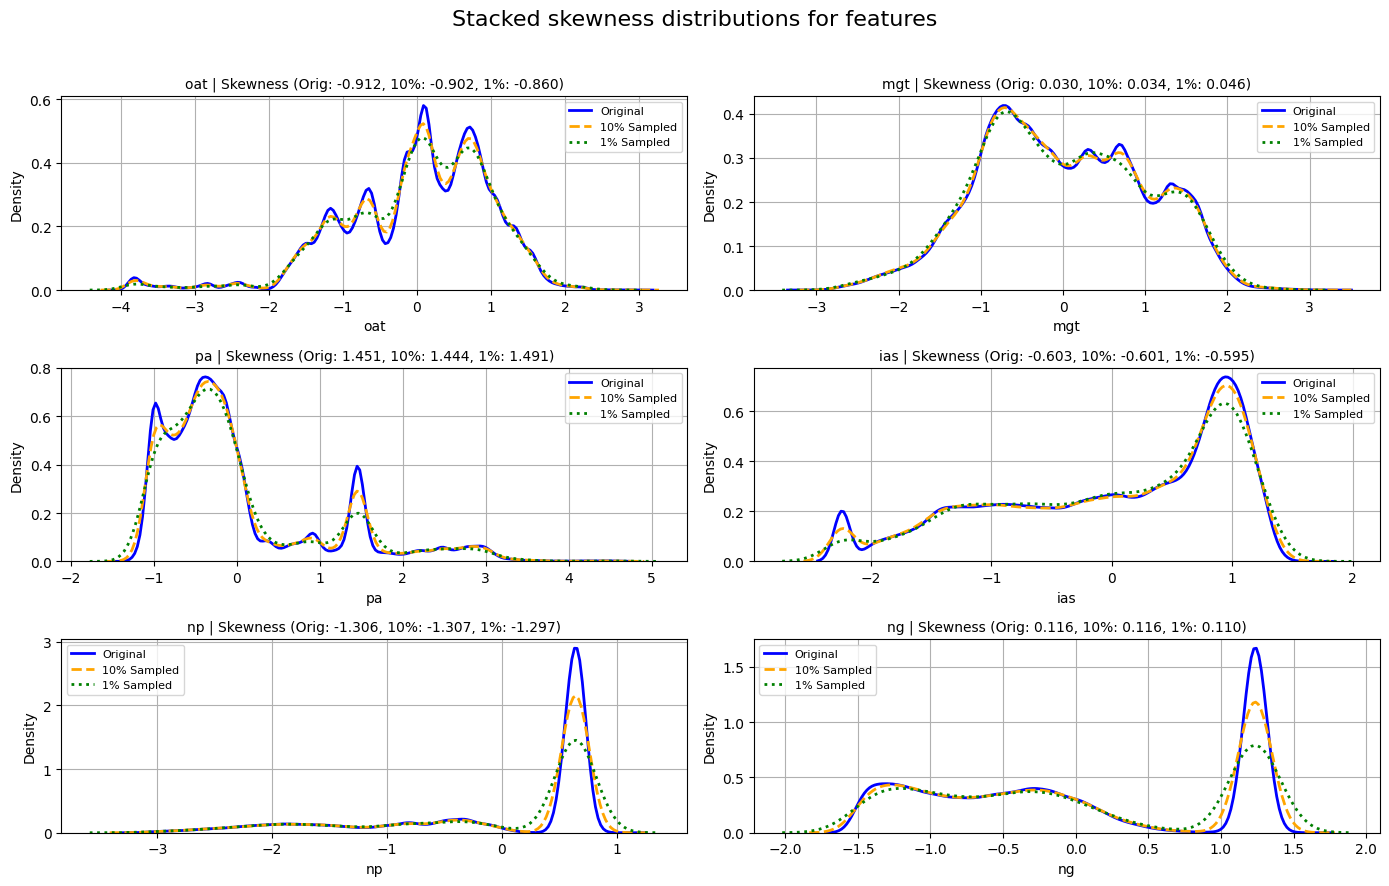

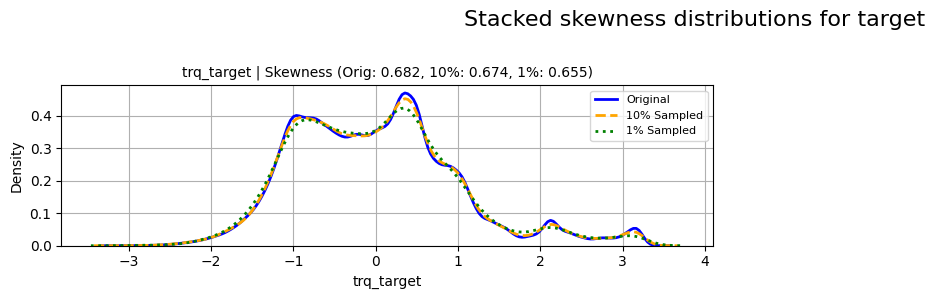

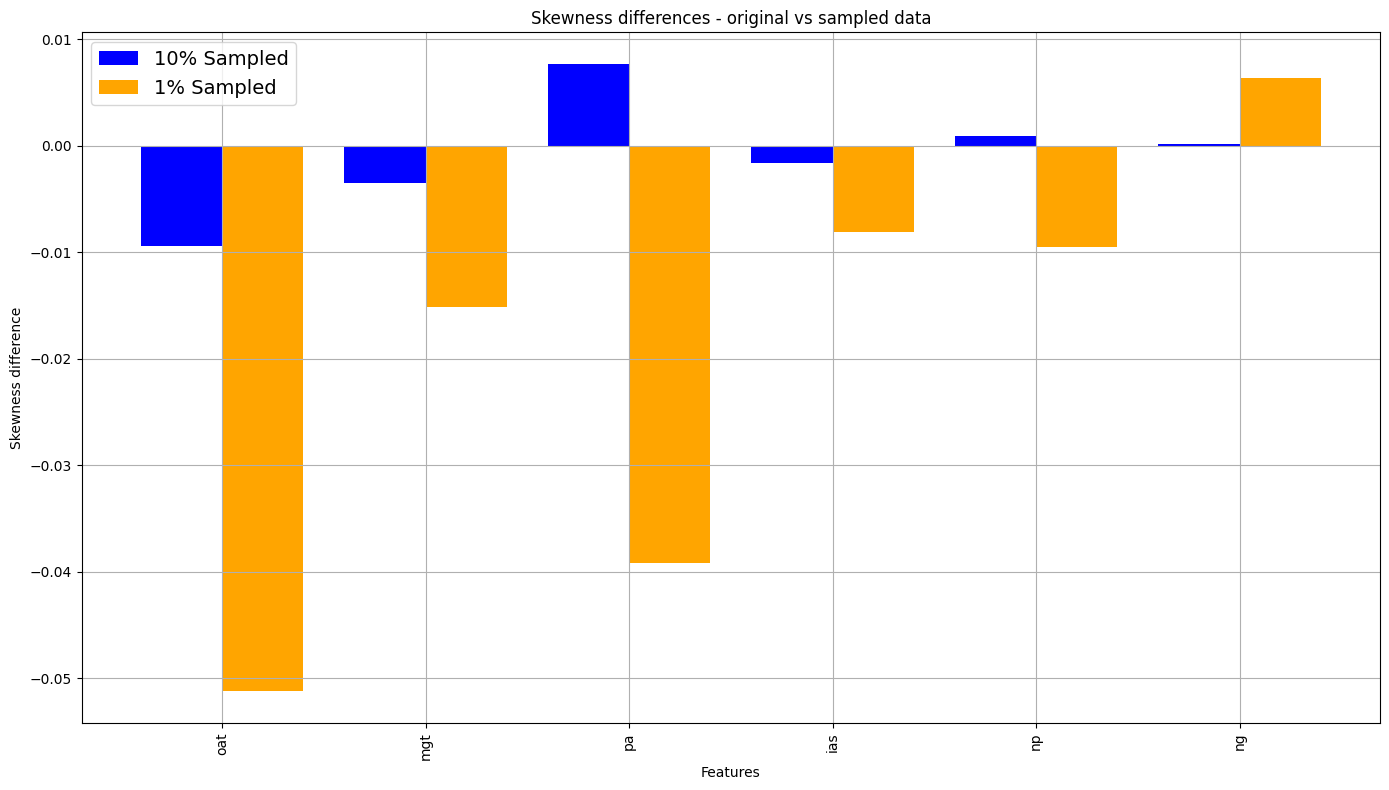

In [ ]:
import seaborn as sns
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

df_x = pd.read_csv('../dataset/0-original/X.csv').drop(columns=['id'])
df_y = pd.read_csv('../dataset/0-original/y.csv')
df_y['trq_target'] = df_x['trq_measured'] / (df_y['trq_margin'] / 100 + 1)

### NORMALIZE DATA ###
df_x_normalized = (df_x - df_x.mean()) / df_x.std()
df_y_normalized = df_y.copy()
df_y_normalized['trq_target'] = (df_y['trq_target'] - df_y['trq_target'].mean()) / df_y['trq_target'].std()
df_x_normalized.drop(columns=['trq_measured'], inplace=True)

device = "cpu"
train_x_1 = torch.tensor(df_x_normalized.values, dtype=torch.float32, device=device)
train_y_1 = torch.tensor(df_y_normalized[['trq_target', 'faulty']].values, dtype=torch.float32, device=device)
assert train_x_1.shape[0] == train_y_1.shape[0]

### DOWNSAMPLE DATA TO 10% AND 1% OF THE ORIGINAL SIZE ###
np.random.seed(42)
random_indices_10 = np.random.choice(train_x_1.shape[0], size=train_x_1.shape[0] // 10, replace=False)
train_x_10 = train_x_1[random_indices_10].numpy()
train_y_10 = train_y_1[random_indices_10].numpy()
random_indices_100 = np.random.choice(train_x_1.shape[0], size=train_x_1.shape[0] // 100, replace=False)
train_x_100 = train_x_1[random_indices_100].numpy()
train_y_100 = train_y_1[random_indices_100].numpy()

### CONVERT SAMPLED DATA TO DATAFRAMES ###
df_x_10 = pd.DataFrame(train_x_10, columns=df_x_normalized.columns)
df_y_10 = pd.DataFrame(train_y_10, columns=['trq_target', 'faulty'])
df_x_100 = pd.DataFrame(train_x_100, columns=df_x_normalized.columns)
df_y_100 = pd.DataFrame(train_y_100, columns=['trq_target', 'faulty'])

### PLOT SKEWNESS DISTRIBUTIONS ###
def plot_stacked_skewness(df_original, df_sampled_10, df_sampled_100, title):
    num_features = len(df_original.columns)
    rows = (num_features + 1) // 2
    fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 3))
    fig.suptitle(title, fontsize=16)
    axes = axes.flatten()

    for idx, feature in enumerate(df_original.columns):
        sns.kdeplot(df_original[feature], ax=axes[idx], label="Original", color="blue", linewidth=2)
        sns.kdeplot(df_sampled_10[feature], ax=axes[idx], label="10% Sampled", color="orange", linestyle="dashed", linewidth=2)
        sns.kdeplot(df_sampled_100[feature], ax=axes[idx], label="1% Sampled", color="green", linestyle="dotted", linewidth=2)
        axes[idx].set_title(f"{feature} | Skewness (Orig: {df_original[feature].skew():.3f}, 10%: {df_sampled_10[feature].skew():.3f}, 1%: {df_sampled_100[feature].skew():.3f})", fontsize=10)
        axes[idx].legend(fontsize=8)
        axes[idx].grid()

    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot stacked skewness for input features
plot_stacked_skewness(df_x_normalized, df_x_10, df_x_100, "Stacked skewness distributions for features")

# Plot stacked skewness for target variable
plot_stacked_skewness(df_y_normalized[['trq_target']], df_y_10[['trq_target']], df_y_100[['trq_target']], "Stacked skewness distributions for target")

### PLOT SKEWNESS DIFFERENCES ###
skew_diff_10 = df_x_normalized.skew() - df_x_10.skew()
skew_diff_100 = df_x_normalized.skew() - df_x_100.skew()

plt.figure(figsize=(14, 8))
features = df_x_normalized.columns
x = np.arange(len(features))

plt.bar(x - 0.2, skew_diff_10, width=0.4, label="10% Sampled", color='blue')
plt.bar(x + 0.2, skew_diff_100, width=0.4, label="1% Sampled", color='orange')

plt.xlabel("Features")
plt.ylabel("Skewness difference")
plt.title("Skewness differences - original vs sampled data")
plt.xticks(x, features, rotation=90)
plt.legend(fontsize=14)
plt.tight_layout()
plt.grid()
plt.show()


# Feature building

In [13]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

df_x_10 = pd.DataFrame(train_x_10, columns=df_x_normalized.columns)

### CREATE NEW FEATURES ###

# Add Polynomial Features (degree=N includes features up to N°)
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(df_x_10)
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(df_x_10.columns))

# Add NP/NG ratio feature
df_x_10['np_ng_ratio'] = df_x_10['np'] / df_x_10['ng']

# Air density formula: da = 1.2376 * pa + 118.8 * oat - 1782
df_x_10['da'] = (1.2376 * df_x_10['pa']) + (118.8 * df_x_10['oat']) - 1782

# Normalize original features based on air density (da)
for col in df_x_10.columns:
    if col not in ['da']:  # Avoid normalizing air density itself
        df_x_10[f'{col}_norm_da'] = df_x_10[col] / df_x_10['da']

# Constants for ISA model
T0 = 288.15  # Sea-level standard temperature (K)
p0 = 101325  # Sea-level standard atmospheric pressure (Pa)
a = 0.0065   # Temperature lapse rate (K/m)
g = 9.80665  # Gravitational acceleration (m/s^2)
R = 8.3144598  # Universal gas constant (J/(mol·K))
RS = 287.05  # Specific gas constant for air (J/(kg·K))

# Compute pressure at altitude (h in meters, assuming pressure altitude in dataset is in feet)
df_x_10['h_m'] = df_x_10['pa'] * 0.3048  # Convert pressure altitude from feet to meters
df_x_10['P'] = p0 * (1 - (a * df_x_10['h_m']) / T0) ** (g / (R * a))

# Compute air density (rho), ensuring valid values
# If oat is greater than 0, compute the air density. Otherwise, set it to a small constant (1e-6)
df_x_10['rho'] = np.where(df_x_10['oat'] > 0, df_x_10['P'] / (RS * df_x_10['oat']), 1e-6)


# Normalize original features based on air density (rho)
for col in ['oat', 'mgt', 'pa', 'ias', 'np', 'ng']:
    df_x_10[f'{col}_air_density'] = df_x_10[col] / df_x_10['rho']

#print(df_x_10.isna().sum())  # Show NaNs per column

# Concatenate original and new features
df_x_10_builded = pd.concat([df_x_10, poly_df], axis=1)

# Remove duplicate columns
df_x_10_builded = df_x_10_builded.loc[:, ~df_x_10_builded.columns.duplicated()]

# Print description
df_x_10_builded.describe()


oat           mgt            pa           ias            np  \
count  74262.000000  74262.000000  74262.000000  74262.000000  74262.000000   
mean      -0.004710     -0.002197      0.003076      0.000417     -0.000443   
std        0.998396      1.001558      0.999820      1.001316      1.002379   
min       -3.957951     -2.891119     -1.267548     -2.241119     -3.094517   
25%       -0.641596     -0.755174     -0.664085     -0.805538     -0.514902   
50%        0.102259     -0.079219     -0.299315      0.262760      0.596009   
75%        0.722139      0.760414      0.138518      0.884315      0.661062   
max        2.954227      3.188884      4.591224      1.500573      0.933786   

                 ng   np_ng_ratio            da   oat_norm_da   mgt_norm_da  \
count  74262.000000  74262.000000  74262.000000  74262.000000  74262.000000   
mean      -0.000174      0.248104  -1782.555664     -0.000033     -0.000002   
std        0.998953     91.102753    118.724518      0.000539      0.000559   
min       -1.517283  -1340.388184  -2252.272949     -0.002065     -0.002147   
25%       -0.907072     -1.489863  -1858.696808     -0.000426     -0.000434   
50%       -0.189069     -0.728237  -1768.095459     -0.000058      0.000044   
75%        1.205672     -0.459560  -1696.347900      0.000345      0.000428   
max        1.467014  12825.647461  -1430.272705      0.001757      0.001622   

       ...         ias^3      ias^2 np      ias^2 ng      ias np^2  \
count  ...  74262.000000  74262.000000  74262.000000  74262.000000   
mean   ...     -0.602588      0.118723      0.000669     -0.350238   
std    ...      2.623519      1.326592      1.349526      1.573700   
min    ...    -11.256282    -15.517435     -7.581808    -21.391682   
25%    ...     -0.522708     -0.190376     -0.399104     -0.443773   
50%    ...      0.018142      0.146987     -0.028344      0.069044   
75%    ...      0.691547      0.630464      0.445660      0.360484   
max    ...      3.378872      4.690047      7.326797      5.835922   

          ias np ng      ias ng^2          np^3       np^2 ng       np ng^2  \
count  74262.000000  74262.000000  74262.000000  74262.000000  74262.000000   
mean       0.213432     -0.100648     -1.317659      0.729915     -0.337238   
std        0.969074      1.138734      4.073986      2.128876      1.373392   
min       -3.504015     -5.106820    -29.633192     -3.954202     -6.451974   
25%       -0.315838     -0.623589     -0.136513     -0.354315     -0.795343   
50%       -0.037837      0.015378      0.211718     -0.075052      0.046932   
75%        0.506860      0.454977      0.288886      0.336398      0.519884   
max        9.912276      2.578029      0.814220     13.410119      1.932159   

               ng^3  
count  74262.000000  
mean       0.115208  
std        1.536363  
min       -3.493011  
25%       -0.746320  
50%       -0.006759  
75%        1.752619  
max        3.157206  

[8 rows x 101 columns]

### Regression feature selection

c:\Users\fede0\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


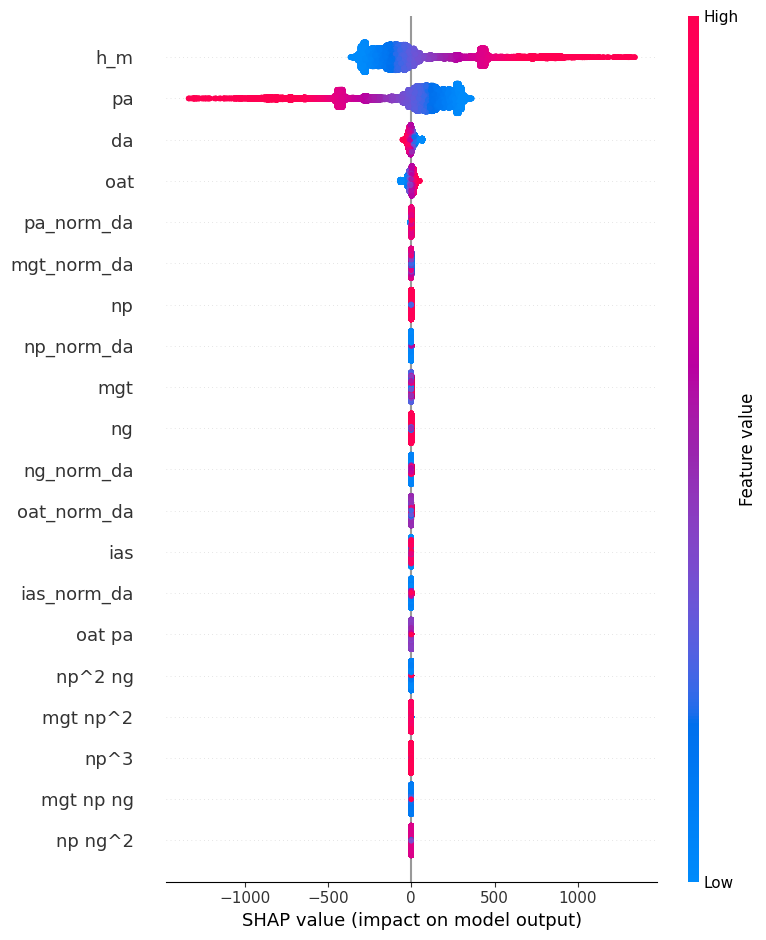

In [9]:
from sklearn.linear_model import LinearRegression
import shap

### FIT A REGRESSION MODEL AND COMPUTE SHAP VALUES ###
model = LinearRegression()
model.fit(df_x_10_builded, df_y_10['trq_target'])
explainer = shap.Explainer(model, df_x_10_builded)
shap_values = explainer(df_x_10_builded)
# Plot SHAP summary with automatic main features selection
shap.summary_plot(shap_values, df_x_10_builded)

In [10]:
import numpy as np

### SELECT TOP N FEATURES BASED ON SHAP VALUES ###
n = 25

# Compute mean absolute SHAP values for each feature
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Get the indices of the top 50 most important features
top_n_indices = np.argsort(shap_importance)[-n:]

# Get the corresponding feature names
top_n_features = df_x_10_builded.columns[top_n_indices]

# Create a new DataFrame with only the top 50 features
df_x_reg_top = df_x_10_builded[top_n_features].copy()

# Print summary of selected features
print(f"Top {n} selected features:\n{top_n_features.tolist()}")


Top 25 selected features:
['oat^2', 'pa np^2', 'oat np', 'oat mgt', 'pa np ng', 'np ng^2', 'mgt np ng', 'np^3', 'mgt np^2', 'np^2 ng', 'oat pa', 'ias_norm_da', 'ias', 'oat_norm_da', 'ng_norm_da', 'ng', 'mgt', 'np_norm_da', 'np', 'mgt_norm_da', 'pa_norm_da', 'oat', 'da', 'pa', 'h_m']


### Classification feature selection

Select only top N most discriminant features: the code calculates the absolute difference (abs_diff) between the mean feature values for the healthy and faulty groups.

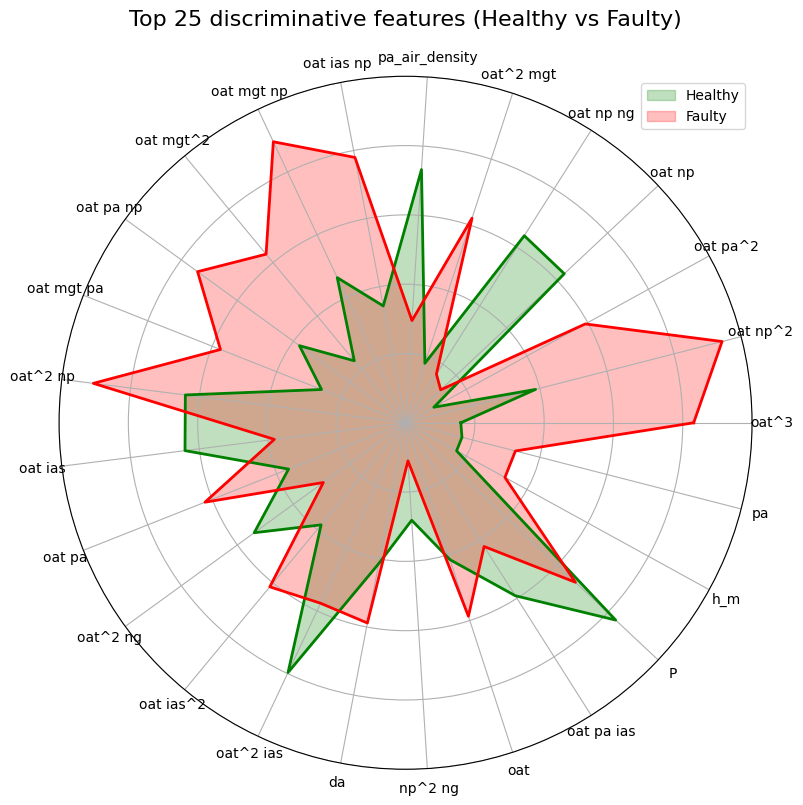

Top 25 discriminative features (full columns):
['oat^3', 'oat np^2', 'oat pa^2', 'oat np', 'oat np ng', 'oat^2 mgt', 'pa_air_density', 'oat ias np', 'oat mgt np', 'oat mgt^2', 'oat pa np', 'oat mgt pa', 'oat^2 np', 'oat ias', 'oat pa', 'oat^2 ng', 'oat ias^2', 'oat^2 ias', 'da', 'np^2 ng', 'oat', 'oat pa ias', 'P', 'h_m', 'pa', 'oat^3', 'oat np^2', 'oat pa^2', 'oat np', 'oat np ng', 'oat^2 mgt', 'pa_air_density', 'oat ias np', 'oat mgt np', 'oat mgt^2', 'oat pa np', 'oat mgt pa', 'oat^2 np', 'oat ias', 'oat pa', 'oat^2 ng', 'oat ias^2', 'oat^2 ias', 'da', 'np^2 ng', 'oat', 'oat pa ias', 'P', 'h_m', 'pa']


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### RADAR CHART FOR TOP N MOST DISCRIMINATIVE FEATURES ###

# ----------------------------------------------------------------------
# 1. Merge df_x (features) and df_y (labels) if necessary
# ----------------------------------------------------------------------
train_data = pd.concat([df_x_10_builded, df_y_10], axis=1)

# Remove the 'id' column if present
if 'id' in train_data.columns:
    train_data = train_data.drop(['id'], axis=1)

# ----------------------------------------------------------------------
# 2. Remove 'trq_target' from the dataset
# ----------------------------------------------------------------------
if 'trq_target' in train_data.columns:
    train_data = train_data.drop(['trq_target'], axis=1)

# ----------------------------------------------------------------------
# 3. Split data into healthy (faulty == 0) and faulty (faulty == 1) subsets
# ----------------------------------------------------------------------
X_train_healthy = train_data[train_data['faulty'] == 0].drop('faulty', axis=1)
X_train_faulty = train_data[train_data['faulty'] == 1].drop('faulty', axis=1)

# ----------------------------------------------------------------------
# 4. Min-Max scaling: Normalize all features between 0 and 1
# ----------------------------------------------------------------------
def min_max_scale(df):
    return (df - df.min()) / (df.max() - df.min())

X_train_healthy_scaled = min_max_scale(X_train_healthy)
X_train_faulty_scaled = min_max_scale(X_train_faulty)

# Compute the mean value of each feature for both groups
mean_features_healthy = X_train_healthy_scaled.mean()
mean_features_faulty = X_train_faulty_scaled.mean()

# Calculate the absolute difference between the mean values of healthy and faulty states
abs_diff = np.abs(mean_features_healthy - mean_features_faulty)

# ----------------------------------------------------------------------
# 5. Select the top N most discriminative features based on the absolute difference
# ----------------------------------------------------------------------
n = 25
top_n_features = abs_diff.nlargest(n).index

# Get the corresponding values for the top 25 features
values_healthy_top_n = mean_features_healthy[top_n_features].values
values_faulty_top_n = mean_features_faulty[top_n_features].values

# Prepare the labels and values for radar chart
labels = top_n_features
values_healthy_top_n = np.concatenate((values_healthy_top_n, [values_healthy_top_n[0]]))
values_faulty_top_n = np.concatenate((values_faulty_top_n, [values_faulty_top_n[0]]))

# Compute angles for the radar chart
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# ----------------------------------------------------------------------
# 6. Adjust figure size dynamically based on the number of features
# ----------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(min(2 * num_vars, 18), min(2 * num_vars, 9)), subplot_kw=dict(polar=True))

# Radar chart for healthy state
ax.fill(angles, values_healthy_top_n, color='g', alpha=0.25, label='Healthy')
ax.plot(angles, values_healthy_top_n, color='g', linewidth=2)

# Radar chart for faulty state
ax.fill(angles, values_faulty_top_n, color='r', alpha=0.25, label='Faulty')
ax.plot(angles, values_faulty_top_n, color='r', linewidth=2)

# Remove y-ticks and set the labels for x-ticks
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=10)

# Set title and limits
ax.set_title(f"Top {n} discriminative features (Healthy vs Faulty)", size=16, pad=18)
ax.set_ylim(0, 1)  # Keep scale between 0 and 1

# Add legend
ax.legend(loc='upper right')

plt.show()

# ----------------------------------------------------------------------
# 7. EXPORT TOP N FEATURES (FULL COLUMNS) TO CSV
# ----------------------------------------------------------------------

# Select the top N features columns from the original dataset
top_n_healthy_features = X_train_healthy[top_n_features]
top_n_faulty_features = X_train_faulty[top_n_features]

# Concatenate the selected columns (healthy and faulty)
top_n_full_columns = pd.concat([top_n_healthy_features, top_n_faulty_features], axis=1)

print(f"Top {n} discriminative features (full columns):\n{top_n_full_columns.columns.tolist()}")


# Export preprocessed dataset

In [7]:
df_x = pd.read_csv('../dataset/0-original/X.csv')
df_y = pd.read_csv('../dataset/0-original/y.csv')
df_y['trq_target'] = df_x['trq_measured'] / (df_y['trq_margin'] / 100 + 1)
# df_x.drop(columns=['trq_measured'], inplace=True)

### CREATE NEW FEATURES ###

# Add Polynomial Features (degree=N includes features up to N°)
poly = PolynomialFeatures(degree=3, include_bias=False)
to_poly=df_x[['oat', 'mgt', 'pa', 'np', 'ng']]
poly_features = poly.fit_transform(to_poly)
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(to_poly.columns))

# Add NP/NG ratio feature
df_x['np_ng_ratio'] = df_x['np'] / df_x['ng']

# Air density formula: da = 1.2376 * pa + 118.8 * oat - 1782
df_x['da'] = (1.2376 * df_x['pa']) + (118.8 * df_x['oat']) - 1782

# Normalize original features based on air density (da)
for col in df_x.columns:
    if col not in ['da']:  # Avoid normalizing air density itself
        df_x[f'{col}_norm_da'] = df_x[col] / df_x['da']

# Constants for ISA model
T0 = 288.15  # Sea-level standard temperature (K)
p0 = 101325  # Sea-level standard atmospheric pressure (Pa)
a = 0.0065   # Temperature lapse rate (K/m)
g = 9.80665  # Gravitational acceleration (m/s^2)
R = 8.3144598  # Universal gas constant (J/(mol·K))
RS = 287.05  # Specific gas constant for air (J/(kg·K))

# Compute pressure at altitude (h in meters, assuming pressure altitude in dataset is in feet)
df_x['h_m'] = df_x['pa'] * 0.3048  # Convert pressure altitude from feet to meters
df_x['P'] = p0 * (1 - (a * df_x['h_m']) / T0) ** (g / (R * a))

# Compute air density (rho), ensuring valid values
# If oat is greater than 0, compute the air density. Otherwise, set it to a small constant (1e-6)
df_x['rho'] = np.where(df_x['oat'] > 0, df_x['P'] / (RS * df_x['oat']), 1e-6)


# Normalize original features based on air density (rho)
for col in ['oat', 'mgt', 'pa', 'ias', 'np', 'ng']:
    df_x[f'{col}_air_density'] = df_x[col] / df_x['rho']

# Concatenate original and new features
df_x_built = pd.concat([df_x, poly_df], axis=1)

# Remove duplicate columns
df_x_built = df_x_built.loc[:, ~df_x_built.columns.duplicated()]

# Print columns to check the DataFrame
print(df_x_built.columns.to_list())

### EXPORT PREPROCESSED DATASET TO CSV ###

# Ensure folder exists
os.makedirs('../dataset/0-original/', exist_ok=True)

# Export as CSV in the '../dataset/' folder
df_x_built.to_csv('../dataset/1-preprocessed/X.csv', index=False)
df_y.to_csv('../dataset/1-preprocessed/y.csv', index=False)


['id', 'trq_measured', 'oat', 'mgt', 'pa', 'ias', 'np', 'ng', 'np_ng_ratio', 'da', 'id_norm_da', 'trq_measured_norm_da', 'oat_norm_da', 'mgt_norm_da', 'pa_norm_da', 'ias_norm_da', 'np_norm_da', 'ng_norm_da', 'np_ng_ratio_norm_da', 'h_m', 'P', 'rho', 'oat_air_density', 'mgt_air_density', 'pa_air_density', 'ias_air_density', 'np_air_density', 'ng_air_density', 'oat^2', 'oat mgt', 'oat pa', 'oat np', 'oat ng', 'mgt^2', 'mgt pa', 'mgt np', 'mgt ng', 'pa^2', 'pa np', 'pa ng', 'np^2', 'np ng', 'ng^2', 'oat^3', 'oat^2 mgt', 'oat^2 pa', 'oat^2 np', 'oat^2 ng', 'oat mgt^2', 'oat mgt pa', 'oat mgt np', 'oat mgt ng', 'oat pa^2', 'oat pa np', 'oat pa ng', 'oat np^2', 'oat np ng', 'oat ng^2', 'mgt^3', 'mgt^2 pa', 'mgt^2 np', 'mgt^2 ng', 'mgt pa^2', 'mgt pa np', 'mgt pa ng', 'mgt np^2', 'mgt np ng', 'mgt ng^2', 'pa^3', 'pa^2 np', 'pa^2 ng', 'pa np^2', 'pa np ng', 'pa ng^2', 'np^3', 'np^2 ng', 'np ng^2', 'ng^3']
